#**Question 1**

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps
from mlxtend.feature_selection import SequentialFeatureSelector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Part 1

In [3]:
data = pd.read_csv('/content/train.csv')

In [4]:
data.shape

(103904, 25)

In [5]:
data.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

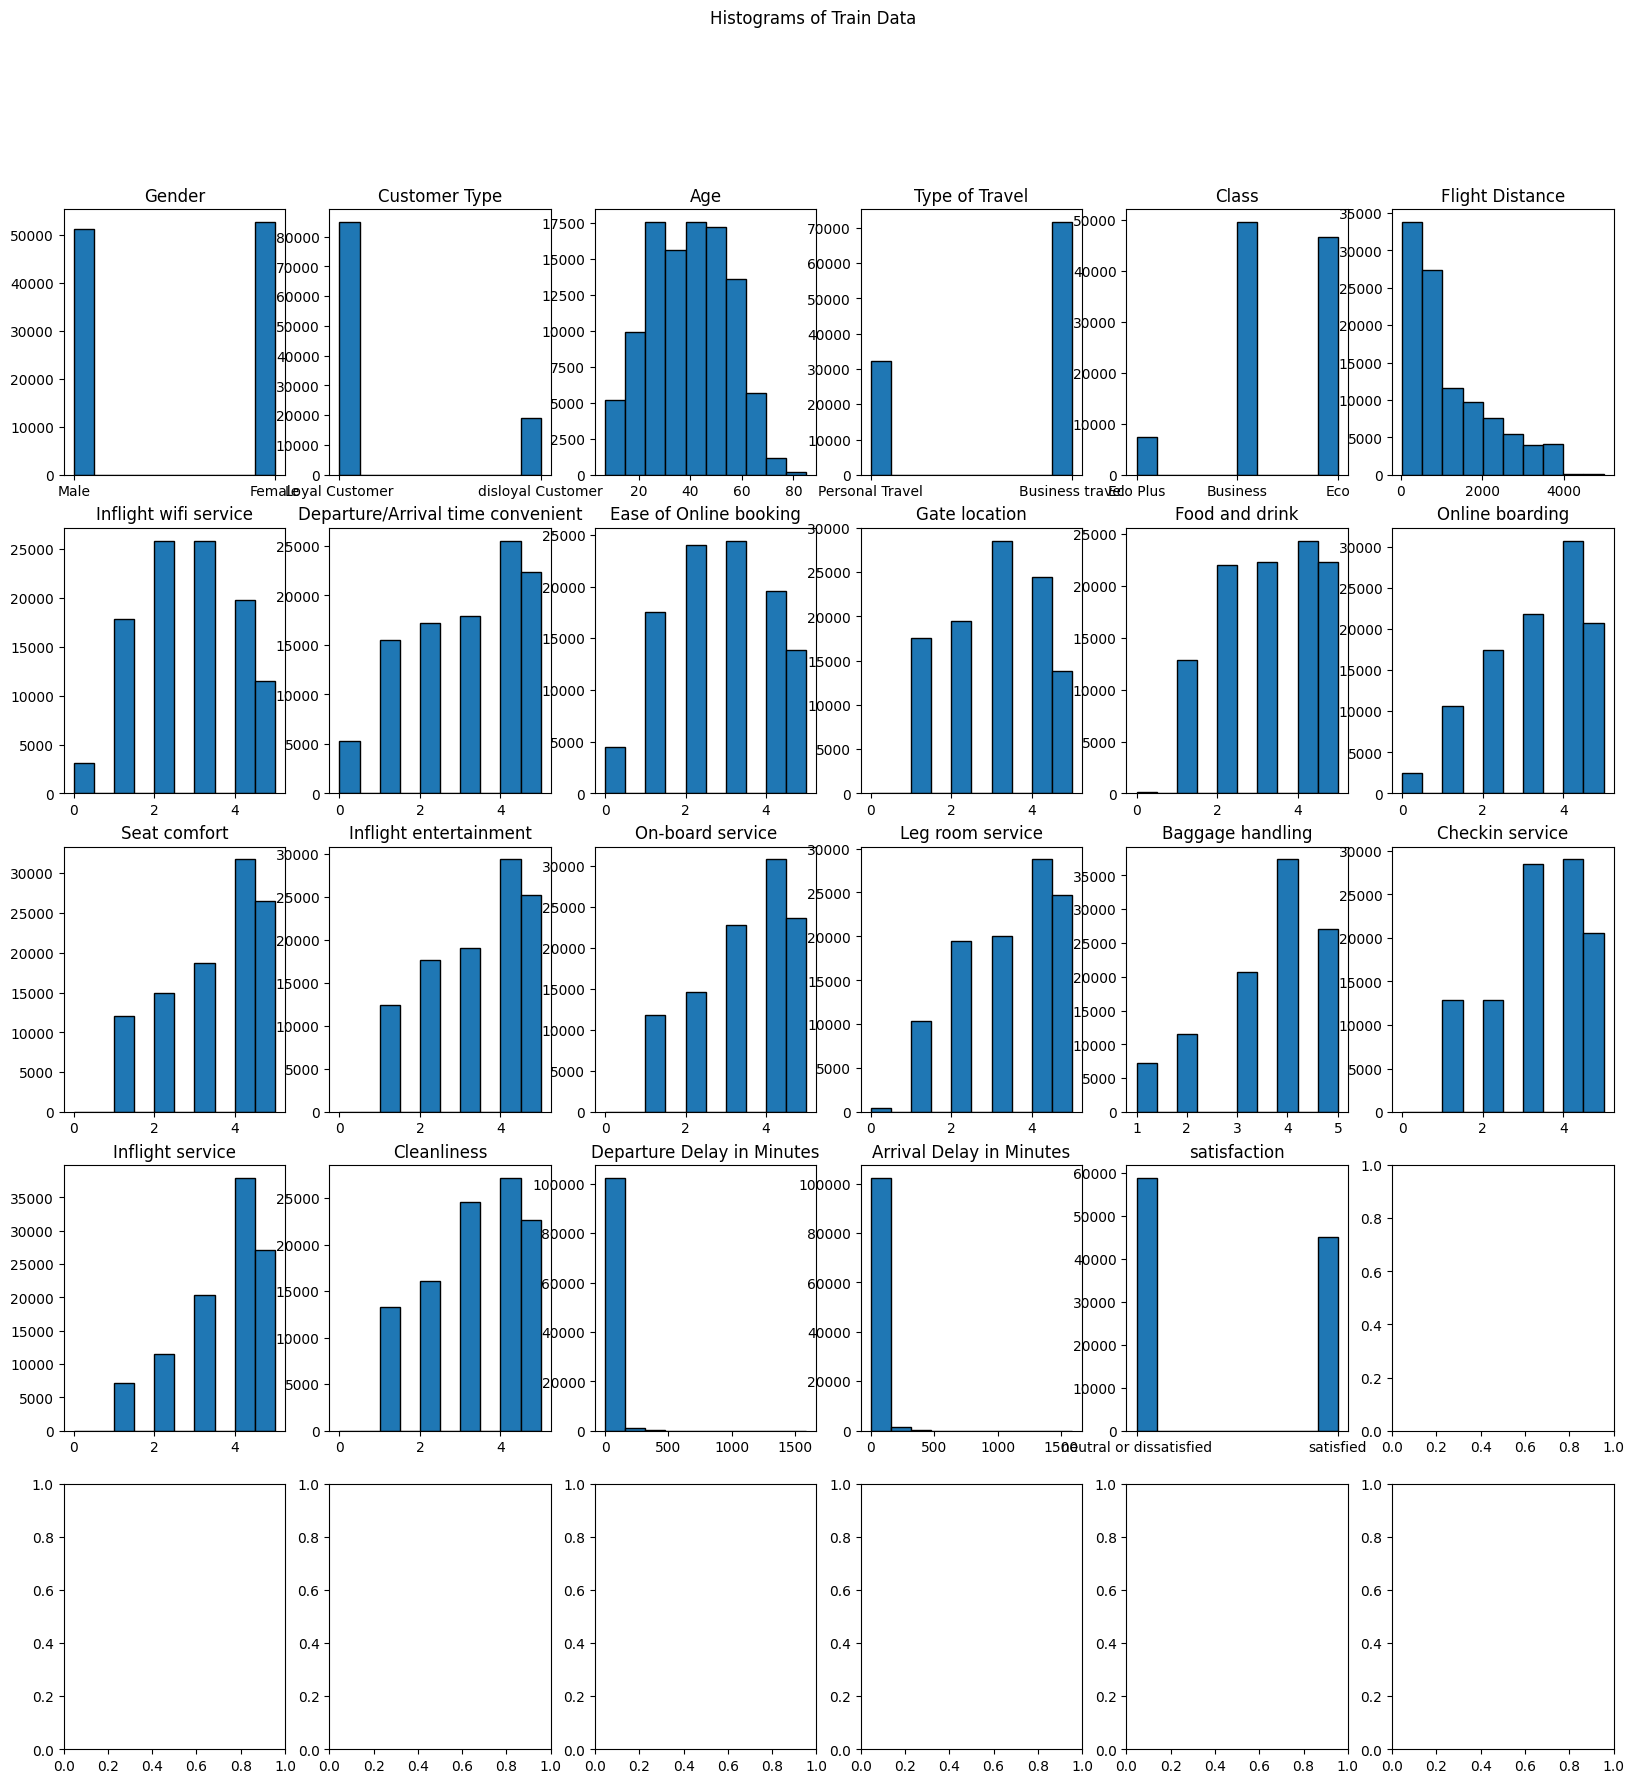

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 6, figsize = (20, 20))

fig.suptitle('Histograms of Train Data')
for i, col in enumerate(data.columns):
    ax[i//6, i%6].hist(data[col],  edgecolor='black')
    ax[i//6, i%6].set_title(col)

Remove the 'id' and 'Unnamed : 0' columns.

In [8]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1).copy()

In [9]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

<ipython-input-9-a10365904018>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')


In [90]:
print("Count of NaN values\n")
data.isna().sum()

Count of NaN values



Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

print("Totol Number of NA values in complete Data : ", data.isna().sum().sum())

Totol Number of NA values in complete Data :  0


In [12]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [65]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()


cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
data_trans = data.copy()

for c in cat_columns:
    data_trans[c] = LE.fit_transform(data[c])

Y = data_trans['satisfaction']
X = data_trans.drop(columns = ['satisfaction'], axis = 1).copy()

print(X.shape)
print(Y.shape)


(103904, 22)
(103904,)


In [14]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


Part 2

In [15]:
from sklearn.tree import DecisionTreeClassifier

DTG = DecisionTreeClassifier()

In [16]:
SFS = SequentialFeatureSelector(DTG, 10,forward = True, floating = False , scoring = "accuracy")
print(SFS)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=10,
                          scoring='accuracy')


In [17]:
SFS.fit(X, Y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(10, 10), scoring='accuracy')

In [91]:
print(f"The Accuray of all 10 featues is : {SFS.k_score_*100}%")

The Accuray of all 10 featues is : 95.06948849542776%


In [93]:
print("Names of Selected Features are :")
SFS.k_feature_names_

Names of Selected Features are :


('Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Baggage handling',
 'Inflight service')

In [20]:
print("Complete information of results : ")
SFS.subsets_[10]

Complete information of results : 


{'feature_idx': (1, 3, 4, 6, 9, 11, 12, 13, 16, 18),
 'cv_scores': array([0.95000241, 0.95000241, 0.94932871, 0.95211972, 0.95202117]),
 'avg_score': 0.9506948849542776,
 'feature_names': ('Customer Type',
  'Type of Travel',
  'Class',
  'Inflight wifi service',
  'Gate location',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'Baggage handling',
  'Inflight service')}

Part 3

In [21]:
SFS_2 = SequentialFeatureSelector(DTG, 10, forward = True, floating = False , scoring = "accuracy", cv = 4)


SFFS = SequentialFeatureSelector(DTG, 10, forward = True, floating = True , scoring = "accuracy", cv = 4)

SBFS = SequentialFeatureSelector(DTG, 10, forward = False, floating = True , scoring = "accuracy", cv = 4)

In [22]:
SFS_2.fit(X, Y)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          k_features=(10, 10), scoring='accuracy')

In [23]:
DTG2 = DecisionTreeClassifier()

SBS = SequentialFeatureSelector(DTG2, 10, forward = False, floating = False , scoring = "accuracy", cv = 4)

SBS.fit(X, Y)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          forward=False, k_features=(10, 10),
                          scoring='accuracy')

In [24]:
SFFS.fit(X, Y)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          floating=True, k_features=(10, 10),
                          scoring='accuracy')

In [25]:
SBFS.fit(X, Y)

SequentialFeatureSelector(cv=4, estimator=DecisionTreeClassifier(),
                          floating=True, forward=False, k_features=(10, 10),
                          scoring='accuracy')

In [26]:
print('The CV scores of SFS :', SFS_2.subsets_[10]['cv_scores'])
print('The CV scores of SBS :', SBS.subsets_[10]['cv_scores'])
print('The CV scores of SFFS :', SFFS.subsets_[10]['cv_scores'])
print('The CV scores of SBFS :', SBFS.subsets_[10]['cv_scores'])

The CV scores of SFS : [0.94941484 0.94991531 0.94929935 0.9513397 ]
The CV scores of SBS : [0.9473745  0.94691253 0.94787496 0.95056976]
The CV scores of SFFS : [0.95141669 0.95110872 0.95064675 0.95295658]
The CV scores of SBFS : [0.9513397  0.95083924 0.95118571 0.95276409]


Text(0.5, 1.0, 'SBFS')

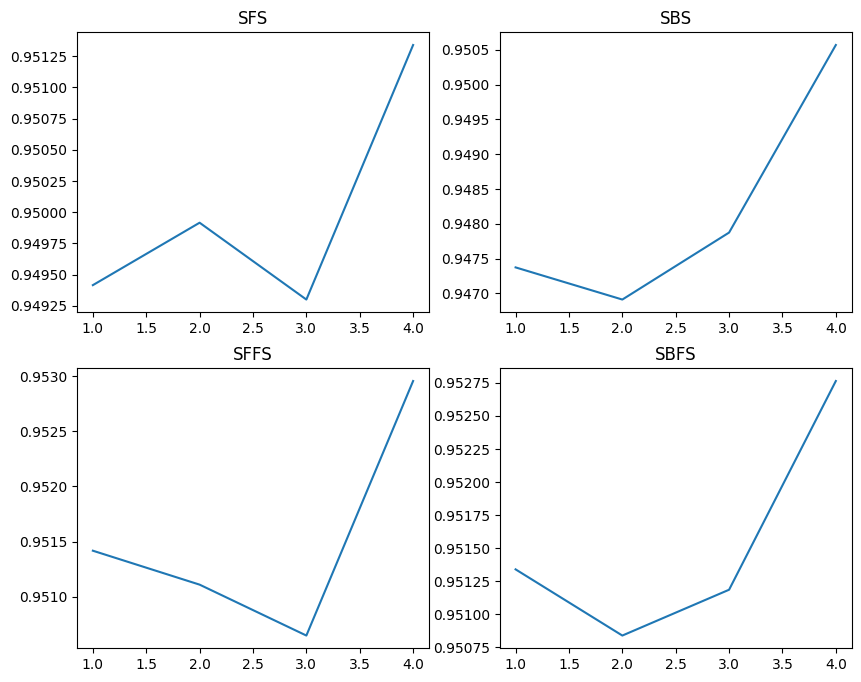

In [62]:
import matplotlib.pyplot as plt
 
x = list(range(1, 5))

plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.plot(x, SFS_2.subsets_[10]['cv_scores'])
plt.title("SFS")


plt.subplot(2, 2, 2)
plt.plot(x, SBS.subsets_[10]['cv_scores'])
plt.title("SBS")



plt.subplot(2, 2, 3)
plt.plot(x, SFFS.subsets_[10]['cv_scores'])
plt.title("SFFS")


plt.subplot(2, 2, 4)
plt.plot(x, SBFS.subsets_[10]['cv_scores'])
plt.title("SBFS")

In [28]:
dataframe_1 = pd.DataFrame.from_dict(SFS_2.get_metric_dict()).T
dataframe_1



,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7895364952263628, 0.792231290421928, 0.7930...",0.790383,"(Online boarding,)",0.003933,0.002454,0.001417
2,"(3, 11)","[0.8483215275639051, 0.8512088081305821, 0.850...",0.849688,"(Type of Travel, Online boarding)",0.001959,0.001222,0.000705
3,"(3, 6, 11)","[0.8915152448413921, 0.8920157068062827, 0.892...",0.891265,"(Type of Travel, Inflight wifi service, Online...",0.001961,0.001224,0.000706
4,"(3, 6, 9, 11)","[0.919271635355713, 0.9229673544810595, 0.9223...",0.921735,"(Type of Travel, Inflight wifi service, Gate l...",0.002316,0.001445,0.000834
5,"(1, 3, 6, 9, 11)","[0.9277024946104097, 0.9285494302433015, 0.929...",0.9288,"(Customer Type, Type of Travel, Inflight wifi ...",0.001189,0.000742,0.000428
6,"(1, 3, 6, 9, 11, 16)","[0.9393671080997844, 0.9425238681860179, 0.939...",0.941302,"(Customer Type, Type of Travel, Inflight wifi ...",0.002895,0.001806,0.001043
7,"(1, 3, 4, 6, 9, 11, 16)","[0.9464120726824762, 0.9486834000615953, 0.948...",0.94825,"(Customer Type, Type of Travel, Class, Infligh...",0.001776,0.001108,0.00064
8,"(1, 3, 4, 6, 9, 11, 16, 18)","[0.9494148444718201, 0.950146288882045, 0.9508...",0.950589,"(Customer Type, Type of Travel, Class, Infligh...",0.001483,0.000925,0.000534
9,"(1, 3, 4, 6, 9, 11, 12, 16, 18)","[0.9491068678780412, 0.9506852479211579, 0.950...",0.950704,"(Customer Type, Type of Travel, Class, Infligh...",0.001811,0.00113,0.000652
10,"(1, 3, 4, 6, 9, 11, 12, 13, 16, 18)","[0.9494148444718201, 0.9499153064367108, 0.949...",0.949992,"(Customer Type, Type of Travel, Class, Infligh...",0.001301,0.000812,0.000469


In [29]:
dataframe_2 = pd.DataFrame.from_dict(SBS.get_metric_dict()).T
dataframe_2

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9426393594086849, 0.9465275639051433, 0.945...",0.945556,"(Gender, Customer Type, Age, Type of Travel, C...",0.002879,0.001796,0.001037
21,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[0.94467970434247, 0.9462195873113644, 0.94568...",0.946595,"(Gender, Customer Type, Age, Type of Travel, C...",0.003095,0.001931,0.001115
20,"(1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[0.9447566984909147, 0.945757622420696, 0.9464...",0.946393,"(Customer Type, Age, Type of Travel, Class, Fl...",0.002241,0.001398,0.000807
19,"(1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...","[0.9449876809362489, 0.9472975053895903, 0.945...",0.946682,"(Customer Type, Age, Type of Travel, Class, In...",0.002617,0.001632,0.000942
18,"(1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16,...","[0.9456036341238065, 0.9470665229442562, 0.946...",0.947115,"(Customer Type, Age, Type of Travel, Class, In...",0.002125,0.001326,0.000765
17,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.9465660609793656, 0.9467970434246997, 0.944...",0.946682,"(Customer Type, Age, Type of Travel, Class, In...",0.002055,0.001282,0.00074
16,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.9452571604558053, 0.9480674468740375, 0.943...",0.946066,"(Customer Type, Age, Type of Travel, Class, In...",0.002656,0.001657,0.000957
15,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9449876809362489, 0.9466430551278103, 0.945...",0.946422,"(Customer Type, Age, Type of Travel, Class, In...",0.002072,0.001292,0.000746
14,"(1, 2, 3, 4, 6, 9, 11, 12, 15, 16, 17, 18, 19,...","[0.94467970434247, 0.9465660609793656, 0.94621...",0.945729,"(Customer Type, Age, Type of Travel, Class, In...",0.001167,0.000728,0.00042
13,"(1, 2, 3, 4, 6, 9, 11, 12, 15, 16, 17, 18, 21)","[0.9435247921157992, 0.9464505697566985, 0.945...",0.944978,"(Customer Type, Age, Type of Travel, Class, In...",0.00195,0.001216,0.000702


In [30]:
dataframe_3 = pd.DataFrame.from_dict(SFFS.get_metric_dict()).T
dataframe_3

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7895364952263628, 0.792231290421928, 0.7930...",0.790383,"(Online boarding,)",0.003933,0.002454,0.001417
2,"(3, 11)","[0.8483215275639051, 0.8512088081305821, 0.850...",0.849688,"(Type of Travel, Online boarding)",0.001959,0.001222,0.000705
3,"(3, 6, 11)","[0.8915152448413921, 0.8920157068062827, 0.892...",0.891265,"(Type of Travel, Inflight wifi service, Online...",0.001961,0.001224,0.000706
4,"(3, 6, 9, 11)","[0.919271635355713, 0.9229673544810595, 0.9223...",0.921735,"(Type of Travel, Inflight wifi service, Gate l...",0.002316,0.001445,0.000834
5,"(1, 3, 6, 9, 11)","[0.9277024946104097, 0.9285494302433015, 0.929...",0.9288,"(Customer Type, Type of Travel, Inflight wifi ...",0.001189,0.000742,0.000428
6,"(1, 3, 6, 9, 11, 16)","[0.9393671080997844, 0.9424853711117955, 0.939...",0.941292,"(Customer Type, Type of Travel, Inflight wifi ...",0.002885,0.0018,0.001039
7,"(1, 3, 4, 6, 9, 11, 16)","[0.9463735756082537, 0.94876039421004, 0.94852...",0.948279,"(Customer Type, Type of Travel, Class, Infligh...",0.001846,0.001152,0.000665
8,"(1, 3, 4, 6, 9, 11, 16, 18)","[0.9495303356944872, 0.9503772713273791, 0.951...",0.950714,"(Customer Type, Type of Travel, Class, Infligh...",0.001403,0.000875,0.000505
9,"(1, 3, 4, 6, 11, 12, 13, 16, 18)","[0.9506852479211579, 0.9508777332922698, 0.950...",0.950993,"(Customer Type, Type of Travel, Class, Infligh...",0.001378,0.00086,0.000496
10,"(1, 3, 4, 6, 11, 12, 13, 16, 18, 19)","[0.9514166923313828, 0.9511087157376039, 0.950...",0.951532,"(Customer Type, Type of Travel, Class, Infligh...",0.00139,0.000867,0.0005


In [31]:
dataframe_4 = pd.DataFrame.from_dict(SBFS.get_metric_dict()).T
dataframe_4

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9425238681860179, 0.9466045580535879, 0.945...",0.945613,"(Gender, Customer Type, Age, Type of Travel, C...",0.002983,0.001861,0.001075
21,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[0.9441022482291346, 0.9459116107175854, 0.945...",0.94621,"(Gender, Customer Type, Age, Type of Travel, C...",0.002716,0.001694,0.000978
20,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[0.9453341546042501, 0.9465275639051433, 0.946...",0.947144,"(Gender, Customer Type, Age, Type of Travel, C...",0.0028,0.001747,0.001008
19,"(1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[0.94467970434247, 0.9458731136433631, 0.94614...",0.946585,"(Customer Type, Age, Type of Travel, Class, Fl...",0.002967,0.001851,0.001069
18,"(1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...","[0.9463735756082537, 0.9471820141669233, 0.945...",0.946816,"(Customer Type, Age, Type of Travel, Class, Fl...",0.001617,0.001008,0.000582
17,"(1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 16, ...","[0.9439097628580227, 0.9471820141669233, 0.946...",0.946402,"(Customer Type, Age, Type of Travel, Class, Fl...",0.002357,0.00147,0.000849
16,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9444872189713581, 0.9465275639051433, 0.947...",0.946537,"(Customer Type, Age, Type of Travel, Class, In...",0.002062,0.001286,0.000743
15,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9451416692331382, 0.9471050200184786, 0.946...",0.946624,"(Customer Type, Age, Type of Travel, Class, In...",0.001393,0.000869,0.000502
14,"(1, 2, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18, 20,...","[0.9458731136433631, 0.9460655990144748, 0.944...",0.945719,"(Customer Type, Age, Type of Travel, Class, In...",0.000869,0.000542,0.000313
13,"(1, 2, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18, 21)","[0.944795195565137, 0.9452956575300278, 0.9458...",0.94545,"(Customer Type, Age, Type of Travel, Class, In...",0.000708,0.000441,0.000255


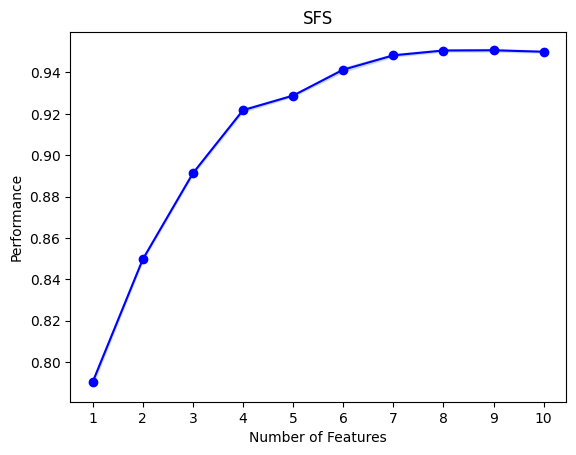

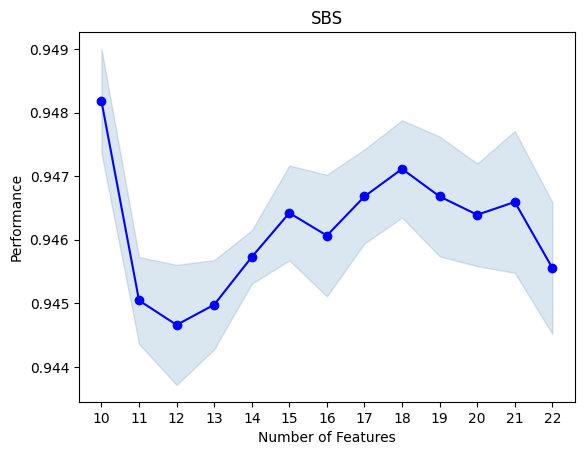

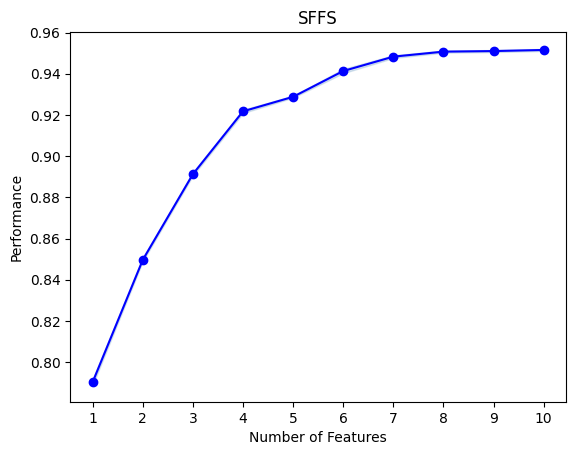

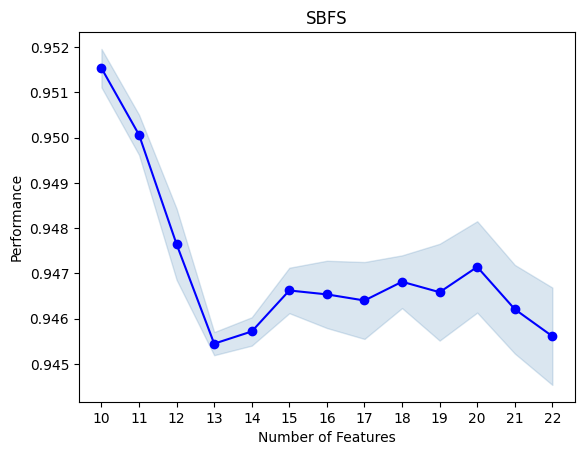

In [97]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


plot_sfs(SFS_2.get_metric_dict(), kind='std_err')
plt.title('SFS')
plt.show()

plot_sfs(SBS.get_metric_dict(), kind='std_err')
plt.title('SBS')
plt.show()

plot_sfs(SFFS.get_metric_dict(), kind='std_err')
plt.title('SFFS')
plt.show()

plot_sfs(SBFS.get_metric_dict(), kind='std_err')
plt.title('SBFS')
plt.show()

###**Part 6**

In [32]:
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [33]:
#Also since we have just 2 Class.

def confusion_matrix(model,X,Y):
  Y_pred = model.predict(X)
  Y_t = np.array(Y)

  tp = (Y_pred[Y_pred == Y] == 1).sum() 
  fp = (Y_pred[Y_pred != Y] == 1).sum() 
  tn = (Y_pred[Y_pred == Y] == 0).sum() 
  fn = (Y_pred[Y_pred != Y] == 0).sum() 

  return tp,fp,fn,tn

In [34]:
def accuracy(model,X,Y):
    tp,fp,fn,tn = confusion_matrix(model,X,Y)
    return (tp + tn)/(tp+fp+tn+fn)

###**Using information gain**


In [35]:
def entropy(x,y):
    temp_sum = x+y +0.0000001          #adding small number to neglect error of zero division
    a = x/temp_sum +0.0000001
    b = y/temp_sum +0.0000001  
    return -a*np.log2(a) - b*np.log2(b)


def info_gain(model,X,Y):
    tp,fp,fn,tn = confusion_matrix(model,X,Y)

    return entropy(tp+fn,fp+tn) - (((tp+fp)*entropy(tp,fp) + (tn+fn)*entropy(fn,tn)) / (tp+fp+tn+fn))

**Using euclidean_distance**


In [36]:
def euc_dist(model,X,Y):
    Y_pred = model.predict(X)
    dist = np.sqrt(np.sum((Y_pred - Y)**2))
    return -dist

**Using city_block distance**


In [37]:
def CB_distance(model,X,Y):
    Y_pred = model.predict(X)
    dist = np.sum(abs(Y_pred - Y))
    return -dist

**Using angular_separation**


In [38]:
def ang_seperation(model,X,Y):
    Y_pred = model.predict(X)
    
    numer = np.sum(Y_pred*Y)
    deno1 = np.sum(np.square(Y_pred))
    deno2 = np.sum(np.square(Y)) 

    if deno1 == 0 or deno2 == 0:
      dist = np.inf
    else:
      dist = numer/np.sqrt((deno1*deno2))

    return -dist

In [39]:
def bi_direc_fsg(X, Y, model, check):
    
    X_train,X_test,Y_train,Y_test = tts(X,Y,train_size = 0.8)  

    best_features = set()
    remaining_features = set([i for i in X.columns])    
    best_performance = -np.inf
    curr_performance = -np.inf
    while len(remaining_features) != 0:
    
        selected_feature = None     

        for feature in remaining_features:
            S_new = best_features.union({feature})
            model.fit(X_train[list(S_new)], Y_train)      

            performance = check(model, X_test[list(S_new)], Y_test)      
            if performance > curr_performance:
                curr_performance = performance
                selected_feature = feature

        if selected_feature != None:
            best_features = best_features.union({selected_feature})
            remaining_features = remaining_features - {selected_feature}

        selected_feature = None

        for feature in best_features:
            S_new = best_features - {feature}
            if len(best_features) == 1:
                break

            model.fit(X_train[list(S_new)],Y_train)

            performance = check(model, X_test[list(S_new)], Y_test)    

            if performance > curr_performance:
                curr_performance = performance
                selected_feature = feature

        if selected_feature != None:
            best_features = best_features - {selected_feature}
            reamaining_features = remaining_features.union({selected_feature})

        if curr_performance > best_performance:
            best_performance = curr_performance
        else:
            break

    return list(best_features)

In [40]:
#Reducing the Size so that can get faster result in SVC

class1_indexes = np.where(Y == 1)[0].tolist()
class2_indexes = np.where(Y == 0)[0].tolist()


random_class1_indices = np.random.choice (class1_indexes, 5000, replace = False )
random_class2_indices = np.random.choice (class2_indexes, 5000, replace = False )

final_indexes = np.concatenate ([random_class1_indices, random_class2_indices])


In [41]:
X_new = X.iloc[final_indexes]
Y_new = Y.iloc[final_indexes]

print(X_new.shape)
print(Y_new.shape)

(10000, 22)
(10000,)


###**Using Accuracy Measure**

In [42]:
# Best Features using Decision Tree Classifier

best_feat_dtc = bi_direc_fsg(X.copy(),Y.copy(),DecisionTreeClassifier(),accuracy)

best_feat_svm = bi_direc_fsg(X_new.copy(),Y_new.copy(),SVC(),accuracy)

In [43]:
print("Using Accuracy Measure\n")
print("Best Features Selected by Decision Tree Classifier..\n", best_feat_dtc)
print("\nBest Features Selected by SVC..\n", best_feat_svm)

Using Accuracy Measure

Best Features Selected by Decision Tree Classifier..
 ['Class', 'Inflight entertainment', 'Customer Type', 'Online boarding', 'Inflight wifi service', 'Inflight service', 'Gate location', 'Type of Travel']

Best Features Selected by SVC..
 ['Baggage handling', 'Customer Type', 'Online boarding', 'Inflight wifi service', 'On-board service', 'Gate location', 'Inflight entertainment', 'Ease of Online booking', 'Type of Travel']


###**Using Information Measure**

In [44]:
#Information Gain
best_feat_ig = bi_direc_fsg(X.copy(),Y.copy(),DecisionTreeClassifier(), info_gain)

In [45]:
print("Using Information Measure\n")
print("Best Features Selected by Decision Tree Classifier and Information Gain..\n", best_feat_ig)

Using Information Measure

Best Features Selected by Decision Tree Classifier and Information Gain..
 ['Baggage handling', 'Cleanliness', 'Customer Type', 'Online boarding', 'Inflight wifi service', 'Inflight entertainment', 'Seat comfort', 'Inflight service', 'Class', 'Type of Travel']


###**Using Distance Measure**


In [66]:
#Eucledian Distance
best_feat_euc = bi_direc_fsg(X.copy(),Y.copy(),DecisionTreeClassifier(), euc_dist)

#City-block distance
best_feat_cb = bi_direc_fsg(X.copy(),Y.copy(),DecisionTreeClassifier(), CB_distance)

#Angular separation distance
best_feat_ang = bi_direc_fsg(X.copy(),Y.copy(),DecisionTreeClassifier(), ang_seperation)

In [67]:
print("Using Distance Measure")
print("\nBest Features Selected by Decision Tree Classifier and Angular Separation..\n", best_feat_euc)
print("\nBest Features Selected by Decision Tree Classifier and Euclidian Distance..\n", best_feat_cb)
print("\nBest Features Selected by Decision Tree Classifier and City-Block Distance..\n", best_feat_ang)

Using Distance Measure

Best Features Selected by Decision Tree Classifier and Angular Separation..
 ['Baggage handling', 'Customer Type', 'Online boarding', 'Inflight wifi service', 'Gate location', 'On-board service', 'Inflight service', 'Class', 'Type of Travel']

Best Features Selected by Decision Tree Classifier and Euclidian Distance..
 ['Baggage handling', 'Cleanliness', 'Customer Type', 'Online boarding', 'Inflight wifi service', 'Inflight entertainment', 'Seat comfort', 'Inflight service', 'Type of Travel']

Best Features Selected by Decision Tree Classifier and City-Block Distance..
 ['Arrival Delay in Minutes']


In [68]:
from sklearn.model_selection import cross_val_score

#Computing accuracy with Decision Tree as clssifier
acc_dtc = np.mean(cross_val_score(DecisionTreeClassifier(), X[best_feat_dtc], Y))
acc_svc = np.mean(cross_val_score(DecisionTreeClassifier(), X[best_feat_svm], Y))
im_ig = np.mean(cross_val_score(DecisionTreeClassifier(), X[best_feat_ig], Y))
dist_euc = np.mean(cross_val_score(DecisionTreeClassifier(), X[best_feat_euc], Y))
dist_cb = np.mean(cross_val_score(DecisionTreeClassifier(), X[best_feat_cb], Y))
dist_ang = np.mean(cross_val_score(DecisionTreeClassifier(), X[best_feat_ang], Y))

print(f"Accuracy with Accuracy measure: {acc_dtc}")
print(f"\nAccuracy with Information gain measure: {acc_svc}")
print(f"\nAccuracy with Euclidean distance measure: {im_ig}")
print(f"\nAccuracy with City-block distance measure: {dist_euc}")
print(f"\nAccuracy with Angular separation measure: {dist_cb}")
print(f"\nAccuracy with Angular separation measure: {dist_ang}")

Accuracy with Accuracy measure: 0.9491549950376212

Accuracy with Information gain measure: 0.9432264424557877

Accuracy with Euclidean distance measure: 0.9521866405600473

Accuracy with City-block distance measure: 0.9500404354332886

Accuracy with Angular separation measure: 0.9495784652625836

Accuracy with Angular separation measure: 0.5656086362667757


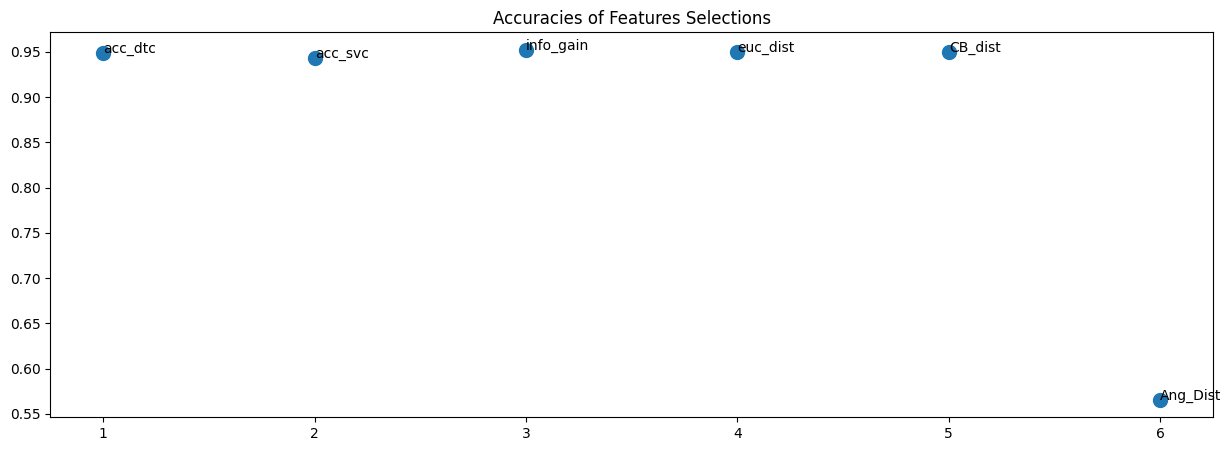

In [86]:
import matplotlib.pyplot as plt
y = [acc_dtc, acc_svc, im_ig, dist_euc, dist_cb, dist_ang]
z = list(range(1, 7))
n = ["acc_dtc", "acc_svc", "info_gain", "euc_dist", "CB_dist", "Ang_Dist"]

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)

ax.scatter(z, y, s = 100)
ax.title.set_text("Accuracies of Features Selections")

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

#**Question2**

###Part 1

In [102]:
#Making the dataset using numpy.multivariate_normal

#Given Covariace Matrix

cov = np.array([[0.6006771, 0.14889879, 0.244939], 
                [0.14889879, 0.58982531, 0.24154981], 
                [0.244939,0.24154981, 0.48778655 ]])

mean = np.zeros(cov.shape[0])

X = np.random.multivariate_normal(mean, cov, 1000)
print("Covariance Matrix is :\n", cov)

print("\nSome datapoints\n", X[0:5])

Covariance Matrix is :
 [[0.6006771  0.14889879 0.244939  ]
 [0.14889879 0.58982531 0.24154981]
 [0.244939   0.24154981 0.48778655]]

Some datapoints
 [[-1.68136645  0.86726968 -0.14880697]
 [-0.81602053  0.63217019  0.2004473 ]
 [ 0.55421973 -0.12315563  0.15196183]
 [-0.10090145  1.65222264  0.43395662]
 [-1.60412273  0.26335353 -2.17338614]]


In [50]:
v_vector = np.array([[1/np.sqrt(6)], [1/np.sqrt(6)], [-2/np.sqrt(6)]])

temp_data = np.dot(X, v_vector)

Y = np.where(temp_data > 0, 0, 1)
print(Y.shape)

(1000, 1)


In [51]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode='markers',
                                  marker=dict(size=3, color=Y.reshape(-1, 1)))])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [52]:
from sklearn.decomposition import PCA as PrincipalComponentAnalysis

PCA = PrincipalComponentAnalysis(n_components = 3)

In [53]:
PCA.fit(X)
X_trans_PCA = PCA.transform(X)

In [54]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(x=X_trans_PCA[:, 0], y=X_trans_PCA[:, 1], z=X_trans_PCA[:, 2],mode='markers',
                                  marker=dict(size=3, color=Y.reshape(-1, 1)))])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [55]:
#function to create substes

import itertools
def findsubsets(n, k):
    nums = list(range(n))
    return list(itertools.combinations(nums, k))

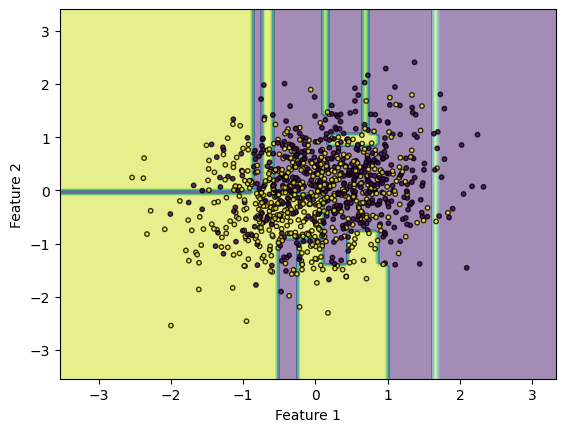

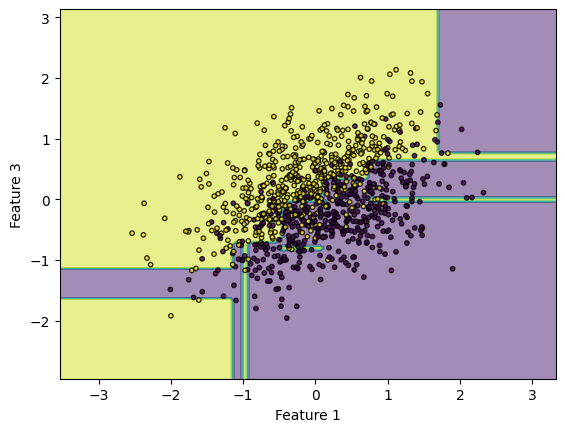

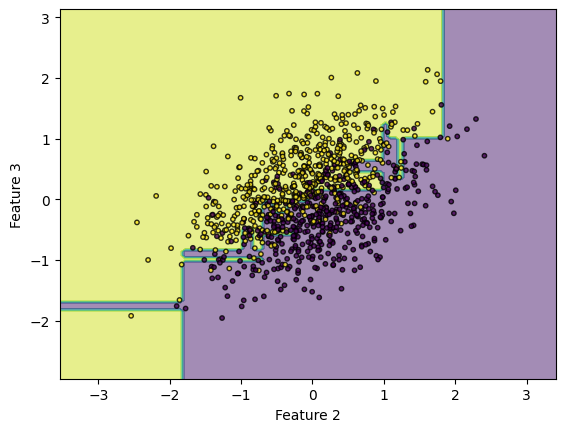

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

subsets = findsubsets(X.shape[1], 2)

for subs in subsets:

    X_temp = X[:, subs]
    
    DTC = DecisionTreeClassifier(max_depth = 6)
    DTC.fit(X_temp, Y)
    disp = DecisionBoundaryDisplay.from_estimator(DTC, X_temp, response_method="predict",
                xlabel="Feature {}".format(subs[0]+1), ylabel="Feature {}".format(subs[1]+1),alpha=0.5)

    disp.ax_.scatter(X_temp[:, 0], X_temp[:, 1], c=Y, edgecolor="k", s=10, alpha = 0.8)

In [57]:
PCA2 = PrincipalComponentAnalysis(n_components = 2)

X_trans_PCA2 = PCA2.fit_transform(X)

print("Principal Components for n_components = 3 : \n", PCA.components_)
print("\nPrincipal Components for n_components = 2 : \n", PCA2.components_)

Principal Components for n_components = 3 : 
 [[-0.59976245 -0.56227671 -0.56932408]
 [ 0.71490055 -0.69614241 -0.06559682]
 [-0.35944707 -0.44635261  0.81949201]]

Principal Components for n_components = 2 : 
 [[-0.59976245 -0.56227671 -0.56932408]
 [ 0.71490055 -0.69614241 -0.06559682]]


So, it selected Feature 1 and Feature 2

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
# print(X_trans_PCA.shape)

for subs in subsets:
    temp_score = []
    for train_index, test_index in (kf.split(X_trans_PCA)):
        X_train = (X_trans_PCA[:, subs])[train_index]
        Y_train = Y[train_index]
        X_test = X_trans_PCA[:, subs][test_index]
        Y_test = Y[test_index]

        DTC = DecisionTreeClassifier()
        DTC.fit(X_train, Y_train)
        temp_score.append(DTC.score(X_test, Y_test))
    print("The Accuray Score for Feature-{} and Feature-{} is : {}".format(subs[0]+1, subs[1]+1, sum(temp_score)/len(temp_score)))

The Accuray Score for Feature-1 and Feature-2 is : 0.48599999999999993
The Accuray Score for Feature-1 and Feature-3 is : 0.961
The Accuray Score for Feature-2 and Feature-3 is : 0.9890000000000001


In [59]:
#finding correlation between each features

for i in range(3):
    print("\nCorrelation of Feature {} with Y :\n {}".format(i+1, np.corrcoef(X_trans_PCA[:,i], Y.reshape(1, -1))))


Correlation of Feature 1 with Y :
 [[1.         0.03625635]
 [0.03625635 1.        ]]

Correlation of Feature 2 with Y :
 [[ 1.        -0.0559707]
 [-0.0559707  1.       ]]

Correlation of Feature 3 with Y :
 [[1.         0.79983065]
 [0.79983065 1.        ]]


In this figure we can that Feature 3 has maxmimum covariance with Y.
So, it should have high preference to be selected.

By if we select, Feature 1 and Feature 2, then it will have relatively less relation with Y. So, they will not give better results.

Also, as seen in the scatter plots and decision boundary, we can see that feature 1 and feature 2, do not seperate the data, hence it is gives lower accuracies.
